In [1]:
from scipy.integrate import odeint
import numpy as np
from ipynb.fs.full.ODE_solvers import Implicit_RK2

In [2]:
def damped_motion_homogeneous(rhs,t,m,b,k):
    y,v=rhs
    drhsdt=[v,-b/m*v-k/m*y]
    return drhsdt 

In [3]:
m=2000 #in kg
b=6000 
k=4500

In [4]:
y0=[0.2,0]

In [5]:
t=np.linspace(0,10,10001)

In [6]:
sol = odeint(damped_motion_homogeneous, y0, t, args=(m,b,k))

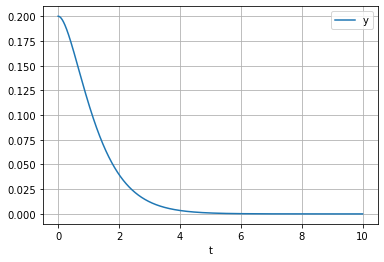

In [7]:
import matplotlib.pyplot as plt
plt.plot(t,sol[:,0],label='y')
#plt.plot(t,sol[:,1],'y',label='v')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [8]:
alpha=b/(2*m)
c1=0.2
c2=0.3
y_an= (c1+c2*t)*np.exp(-alpha*t)

In [9]:
alpha

1.5

In [10]:
sol2=Implicit_RK2(damped_motion_homogeneous, y0, t, args=(m,b,k))

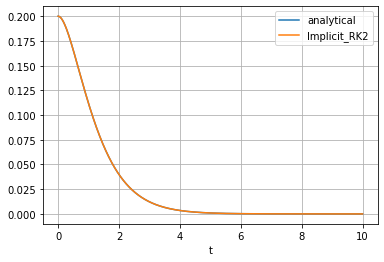

In [11]:
import matplotlib.pyplot as plt
#plt.plot(t,sol[:,0],'x',label='y_odeint')
plt.plot(t,y_an,label='analytical')
plt.plot(t,sol2[:,0],label='Implicit_RK2')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [12]:
def damped_nonhomogeneous(rhs,t,m,b,k,F_0,omega_0):
    y,v=rhs
    drhsdt=[v,-b/m*v-k/m*y+F_0*np.cos(omega_0*t)]
    return drhsdt 

In [13]:
omega_0=np.sqrt(k/m)
F_0=120 #in N


In [14]:
sol3 = odeint(damped_nonhomogeneous, y0, t, args=(m,b,k,F_0,omega_0))

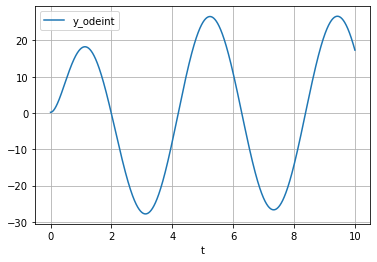

In [15]:
import matplotlib.pyplot as plt
plt.plot(t,sol3[:,0],label='y_odeint')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()